In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [50]:
def model(filepath):
    
    # Converting CSV file to DataFrame
    df = pd.read_csv(filepath)
    
    # Changing the column title `max_power` to `max_power_in_bhp` 
    df.rename(columns = {'max_power':'max_power_in_bhp'}, inplace=True)
    
    # Removing the unit from the `max_power_in_bhp` column
    df[['max_power_in_bhp','unit']]= df['max_power_in_bhp'].str.split(pat=' ', expand=True)

    
    # Convert the `max_power_in_bhp` column to numeric datatype
    df['max_power_in_bhp'] = df['max_power_in_bhp'].apply(pd.to_numeric)
    
    # Drop the df['unit'] column
    df.drop(columns=['unit'], axis=1, inplace=True)
    
    # Drop null values 
    df.dropna(inplace=True)
    
    # Masking out cars with prices above $8,000,000
    masked_price = df['selling_price'] < 8_000_000
    
    df = df[masked_price]
    
    
    return df

### Cleaning the Dataset

In [52]:
# Instantiating the function to clean the dataset
df = model('car details v3.csv')

### Visualizing the relationship between Price and Horse power

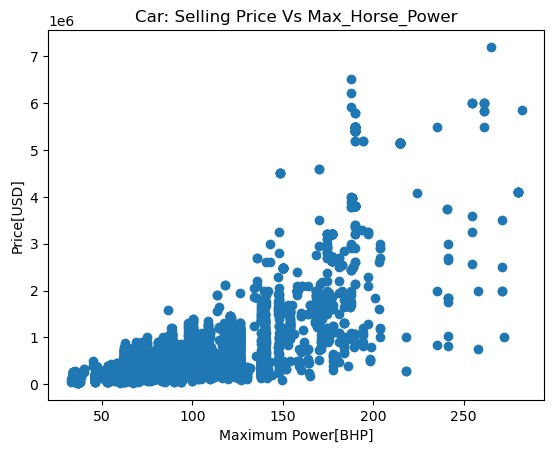

In [6]:
plt.scatter(df['max_power_in_bhp'], df['selling_price'])
plt.xlabel('Maximum Power[BHP]')
plt.title('Car: Selling Price Vs Max_Horse_Power')
plt.ylabel('Price[USD]');

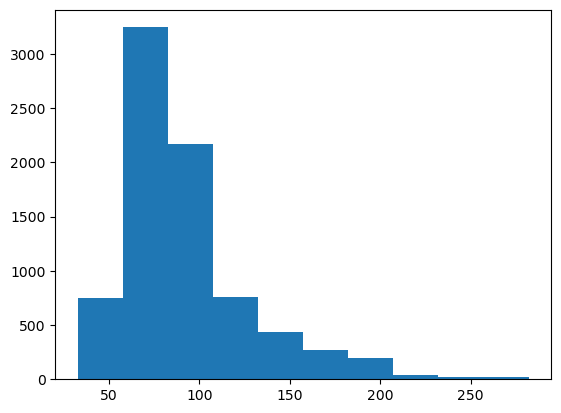

In [8]:
plt.hist(df['max_power_in_bhp']);

## Build a Simple Linear Model for Price Prediction

### Selecting the Feature matrix and Target vectors

In [9]:
# Determining the feature matrix

feature = ['max_power_in_bhp']
X = df[feature]
X.shape

(7905, 1)

In [10]:
# Determining the target vector

y = df['selling_price']
y.shape

(7905,)

In [11]:
# Splitting the feature matrix and target vector into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### Building baseline model

In [12]:
y_train_mean = round(y_train.mean(), 2)
y_train_mean

649538.8

In [13]:
y_pred_baseline = [y_train_mean for y in y_train]
y_pred_baseline[:5]

[649538.8, 649538.8, 649538.8, 649538.8, 649538.8]

#### Plotting the Baseline model on a scatter plot

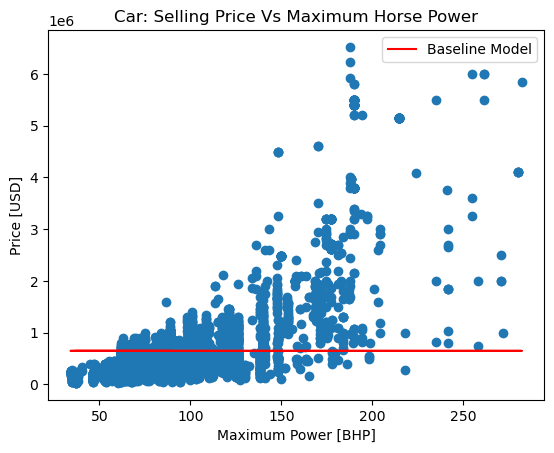

In [14]:
# Plotting the baseline model on the scatter plot

plt.plot(X_train.values, y_pred_baseline, color='red', label='Baseline Model')
plt.scatter(x=X_train, y=y_train)
plt.xlabel('Maximum Power [BHP]')
plt.title('Car: Selling Price Vs Maximum Horse Power')
plt.ylabel('Price [USD]')
plt.legend();

In [15]:
# Calculating the performance matrix

mae_baseline = mean_absolute_error(y_train, y_pred_baseline)


print(f'Mean actual price: {y_train_mean}')
print(f'Baseline MAE: {round(mae_baseline,2)}')

Mean actual price: 649538.8
Baseline MAE: 422433.64


### Iterating the Model

In [16]:
# Instantiate the linear model

model = LinearRegression()
model

LinearRegression()

#### Training the Model

In [17]:
# Train or fit the model

model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Evaluating the model

y_pred_training = model.predict(X_train)
y_pred_training

array([-262074.47807114, 3040167.50607066,  506780.85258006, ...,
        254943.2063147 ,  239933.01547769,  601845.39454778])

### Checking the performance matrix of the training model

In [19]:
# To check the performance, we still use the mean absolute error for the predicted values

mae_training = mean_absolute_error(y_pred_training, y_train)


print(f'Training MAE: {round(mae_training,2)}')


Training MAE: 311930.91


### Testing the Model

In [20]:
# To test the model, we use the feature matrix which we split for testing, X_test.

y_pred_test = model.predict(X_test)
y_pred_test

array([ 518455.44545329,  223255.02565879, 1931081.18311394, ...,
        171553.25722021,  354510.80553352,  355011.14522809])

In [21]:
# Meanwhile the y_test we set aside 
y_test.head()

3578     425000
480      200000
468     2000000
5056     120000
6078    1250000
Name: selling_price, dtype: int64

#### Checking the Performance of the model

In [22]:
# performance testing

mae_pred_test = mean_absolute_error(y_test, y_pred_test)
print(f'Testing MAE: {round(mae_pred_test, 2)}')

Testing MAE: 314454.34


### Communicating result

In [23]:
# Obtaining the coefficient 
coefficient = round(model.coef_[0],2)
print(f'Model coefficient: {coefficient}')

Model coefficient: 16677.99


In [24]:
# Obtaining the Intercept
intercept = round(model.intercept_,2)
print(f'Model intercept: {intercept}')

Model intercept: -879160.1


In [25]:
# Simple Linear Equation `y = c + mx`
print(f'selling_price = {intercept} + {coefficient} * Max_power_in_bhp')

selling_price = -879160.1 + 16677.99 * Max_power_in_bhp


### Plotting the Regression equation on the scatter plot

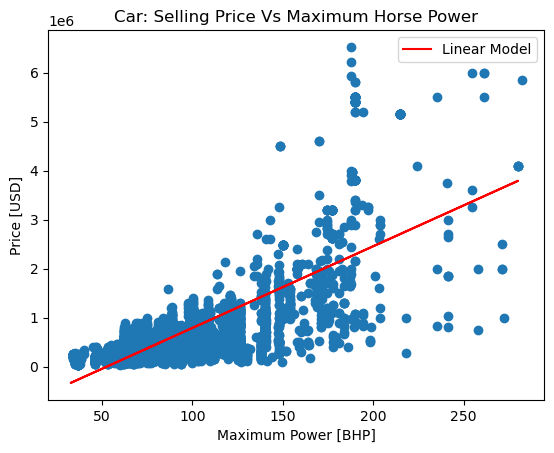

In [26]:
# Plotting the model on the scatter plot

plt.plot(X_test, y_pred_test, color='red', label='Linear Model')
plt.scatter(X_train, y_train)
plt.xlabel('Maximum Power [BHP]')
plt.title('Car: Selling Price Vs Maximum Horse Power')
plt.ylabel('Price [USD]')
plt.legend();